<a href="https://colab.research.google.com/github/tsilverio/Desafio3_DataScience/blob/master/Desafio_3_Leonardo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go
import pandas              as pd
import numpy               as np
import matplotlib.pyplot   as plt
import seaborn             as sns
import re
import missingno           as msno
import numpy               as np

%matplotlib inline

pd.set_option('display.max_columns',500)

In [23]:
from google.colab import files
files.upload()

Saving RH_Perfumaria_cosmeticos.csv to RH_Perfumaria_cosmeticos (1).csv


{'RH_Perfumaria_cosmeticos.csv': b'\xef\xbb\xbfAge;Attrition;BusinessTravel;DailyRate;Department;DistanceFromHome;Education;EducationField;EmployeeCount;EmployeeNumber;EnvironmentSatisfaction;Gender;HourlyRate;JobInvolvement;JobLevel;JobRole;JobSatisfaction;MaritalStatus;MonthlyIncome;MonthlyRate;NumCompaniesWorked;Over18;OverTime;PercentSalaryHike;PerformanceRating;RelationshipSatisfaction;StandardHours;StockOptionLevel;TotalWorkingYears;TrainingTimesLastYear;WorkLifeBalance;YearsAtCompany;YearsInCurrentRole;YearsSinceLastPromotion;YearsWithCurrManager\r\n41;Yes;Travel_Rarely;1102;Sales;1;2;Life Sciences;1;1;2;Female;94;3;2;Sales Executive;4;Single;5993;19479;8;Y;Yes;11;3;1;80;0;8;0;1;6;4;0;5\r\n49;No;Travel_Frequently;279;Research & Development;8;1;Life Sciences;1;2;3;Male;61;2;2;Research Scientist;2;Married;5130;24907;1;Y;No;23;4;4;80;1;10;3;3;10;7;1;7\r\n37;Yes;Travel_Rarely;1373;Research & Development;2;2;Other;1;4;4;Male;92;2;1;Laboratory Technician;3;Single;2090;2396;6;Y;Yes;15;

In [24]:
df = pd.read_csv(r'RH_Perfumaria_cosmeticos.csv', delimiter=";")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [25]:
df.shape

(1470, 35)

In [26]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

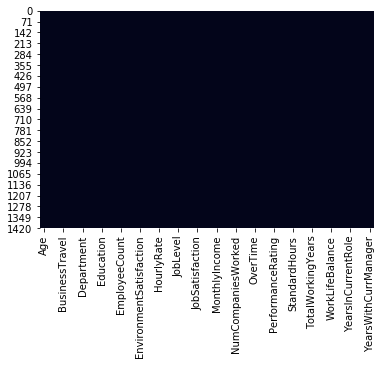

In [28]:
sns.heatmap(df.isnull(), cbar=False)

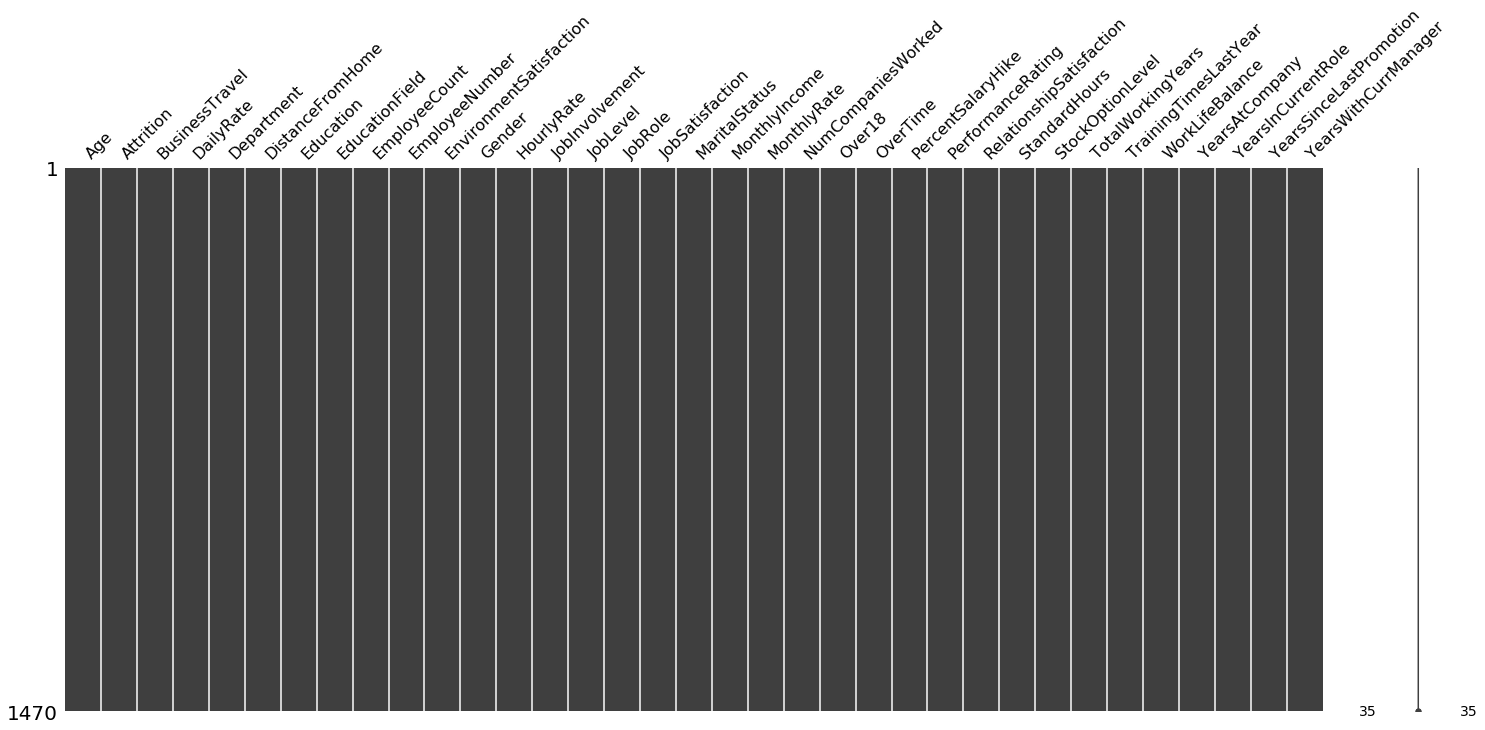

In [29]:
msno.matrix(df)

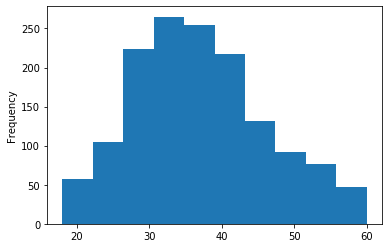

In [30]:
#idade média dos funcionários
df['Age'].plot.hist()

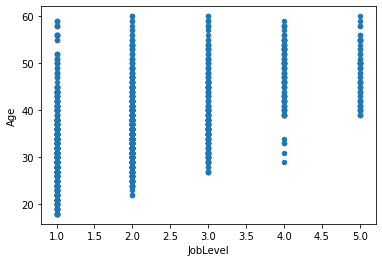

In [31]:
# Nivel do cargo com idade
df.plot.scatter(x='JobLevel', y='Age') 

In [35]:
# Nivel do cargo com idade
trace = go.Scatter(x = df['JobLevel'],
                   y = df['Age'])
data = [trace]
py.iplot(data)

In [44]:
#Satisfação no Trabalho com Total de anos de trabalho

trace = go.Bar(x = df['Gender'],
               y = df['TotalWorkingYears'])
data = [trace]
py.iplot(data)

In [41]:
#Satisfação no Trabalho com Gênero

trace = go.Bar(x = df['Gender'],
               y = df['JobSatisfaction'])
data = [trace]
py.iplot(data)


In [42]:
#Satisfação no Trabalho com Educação

trace = go.Bar(x = df['Gender'],
               y = df['Education'])
data = [trace]
py.iplot(data)

In [0]:
#Satisfação no Trabalho com Número de funcionário

trace = go.Bar(x = df['Gender'],
               y = df['EmployeeNumber'])
data = [trace]
py.iplot(data)

In [46]:
#Satisfação no Trabalho com Anos desde a última promoção

trace = go.Bar(x = df['Gender'],
               y = df['YearsSinceLastPromotion'])
data = [trace]
py.iplot(data)